In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd/content/drive/Shareddrives/MobileNetV2

[Errno 2] No such file or directory: '/content/drive/Shareddrives/MobileNetV2'
/content


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.utils import plot_model

In [ ]:
# Set the number of classes in your dataset
num_classes = 2

In [ ]:
# Define the base model
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

171446536/171446536 [==============================] - 1s 0us/step


In [ ]:
# Add new layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
layer_names=[layer.name for layer in base_model.layers]
print(layer_names)

['input_1', 'conv1_pad', 'conv1_conv', 'conv1_bn', 'conv1_relu', 'pool1_pad', 'pool1_pool', 'conv2_block1_1_conv', 'conv2_block1_1_bn', 'conv2_block1_1_relu', 'conv2_block1_2_conv', 'conv2_block1_2_bn', 'conv2_block1_2_relu', 'conv2_block1_0_conv', 'conv2_block1_3_conv', 'conv2_block1_0_bn', 'conv2_block1_3_bn', 'conv2_block1_add', 'conv2_block1_out', 'conv2_block2_1_conv', 'conv2_block2_1_bn', 'conv2_block2_1_relu', 'conv2_block2_2_conv', 'conv2_block2_2_bn', 'conv2_block2_2_relu', 'conv2_block2_3_conv', 'conv2_block2_3_bn', 'conv2_block2_add', 'conv2_block2_out', 'conv2_block3_1_conv', 'conv2_block3_1_bn', 'conv2_block3_1_relu', 'conv2_block3_2_conv', 'conv2_block3_2_bn', 'conv2_block3_2_relu', 'conv2_block3_3_conv', 'conv2_block3_3_bn', 'conv2_block3_add', 'conv2_block3_out', 'conv3_block1_1_conv', 'conv3_block1_1_bn', 'conv3_block1_1_relu', 'conv3_block1_2_conv', 'conv3_block1_2_bn', 'conv3_block1_2_relu', 'conv3_block1_0_conv', 'conv3_block1_3_conv', 'conv3_block1_0_bn', 'conv3_bl

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.871718 to fit



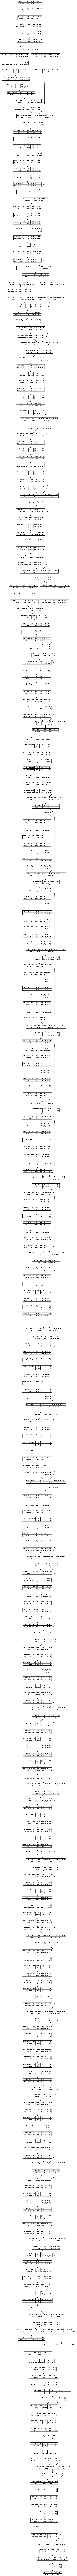

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 17.7 MB/s eta 0:00:00


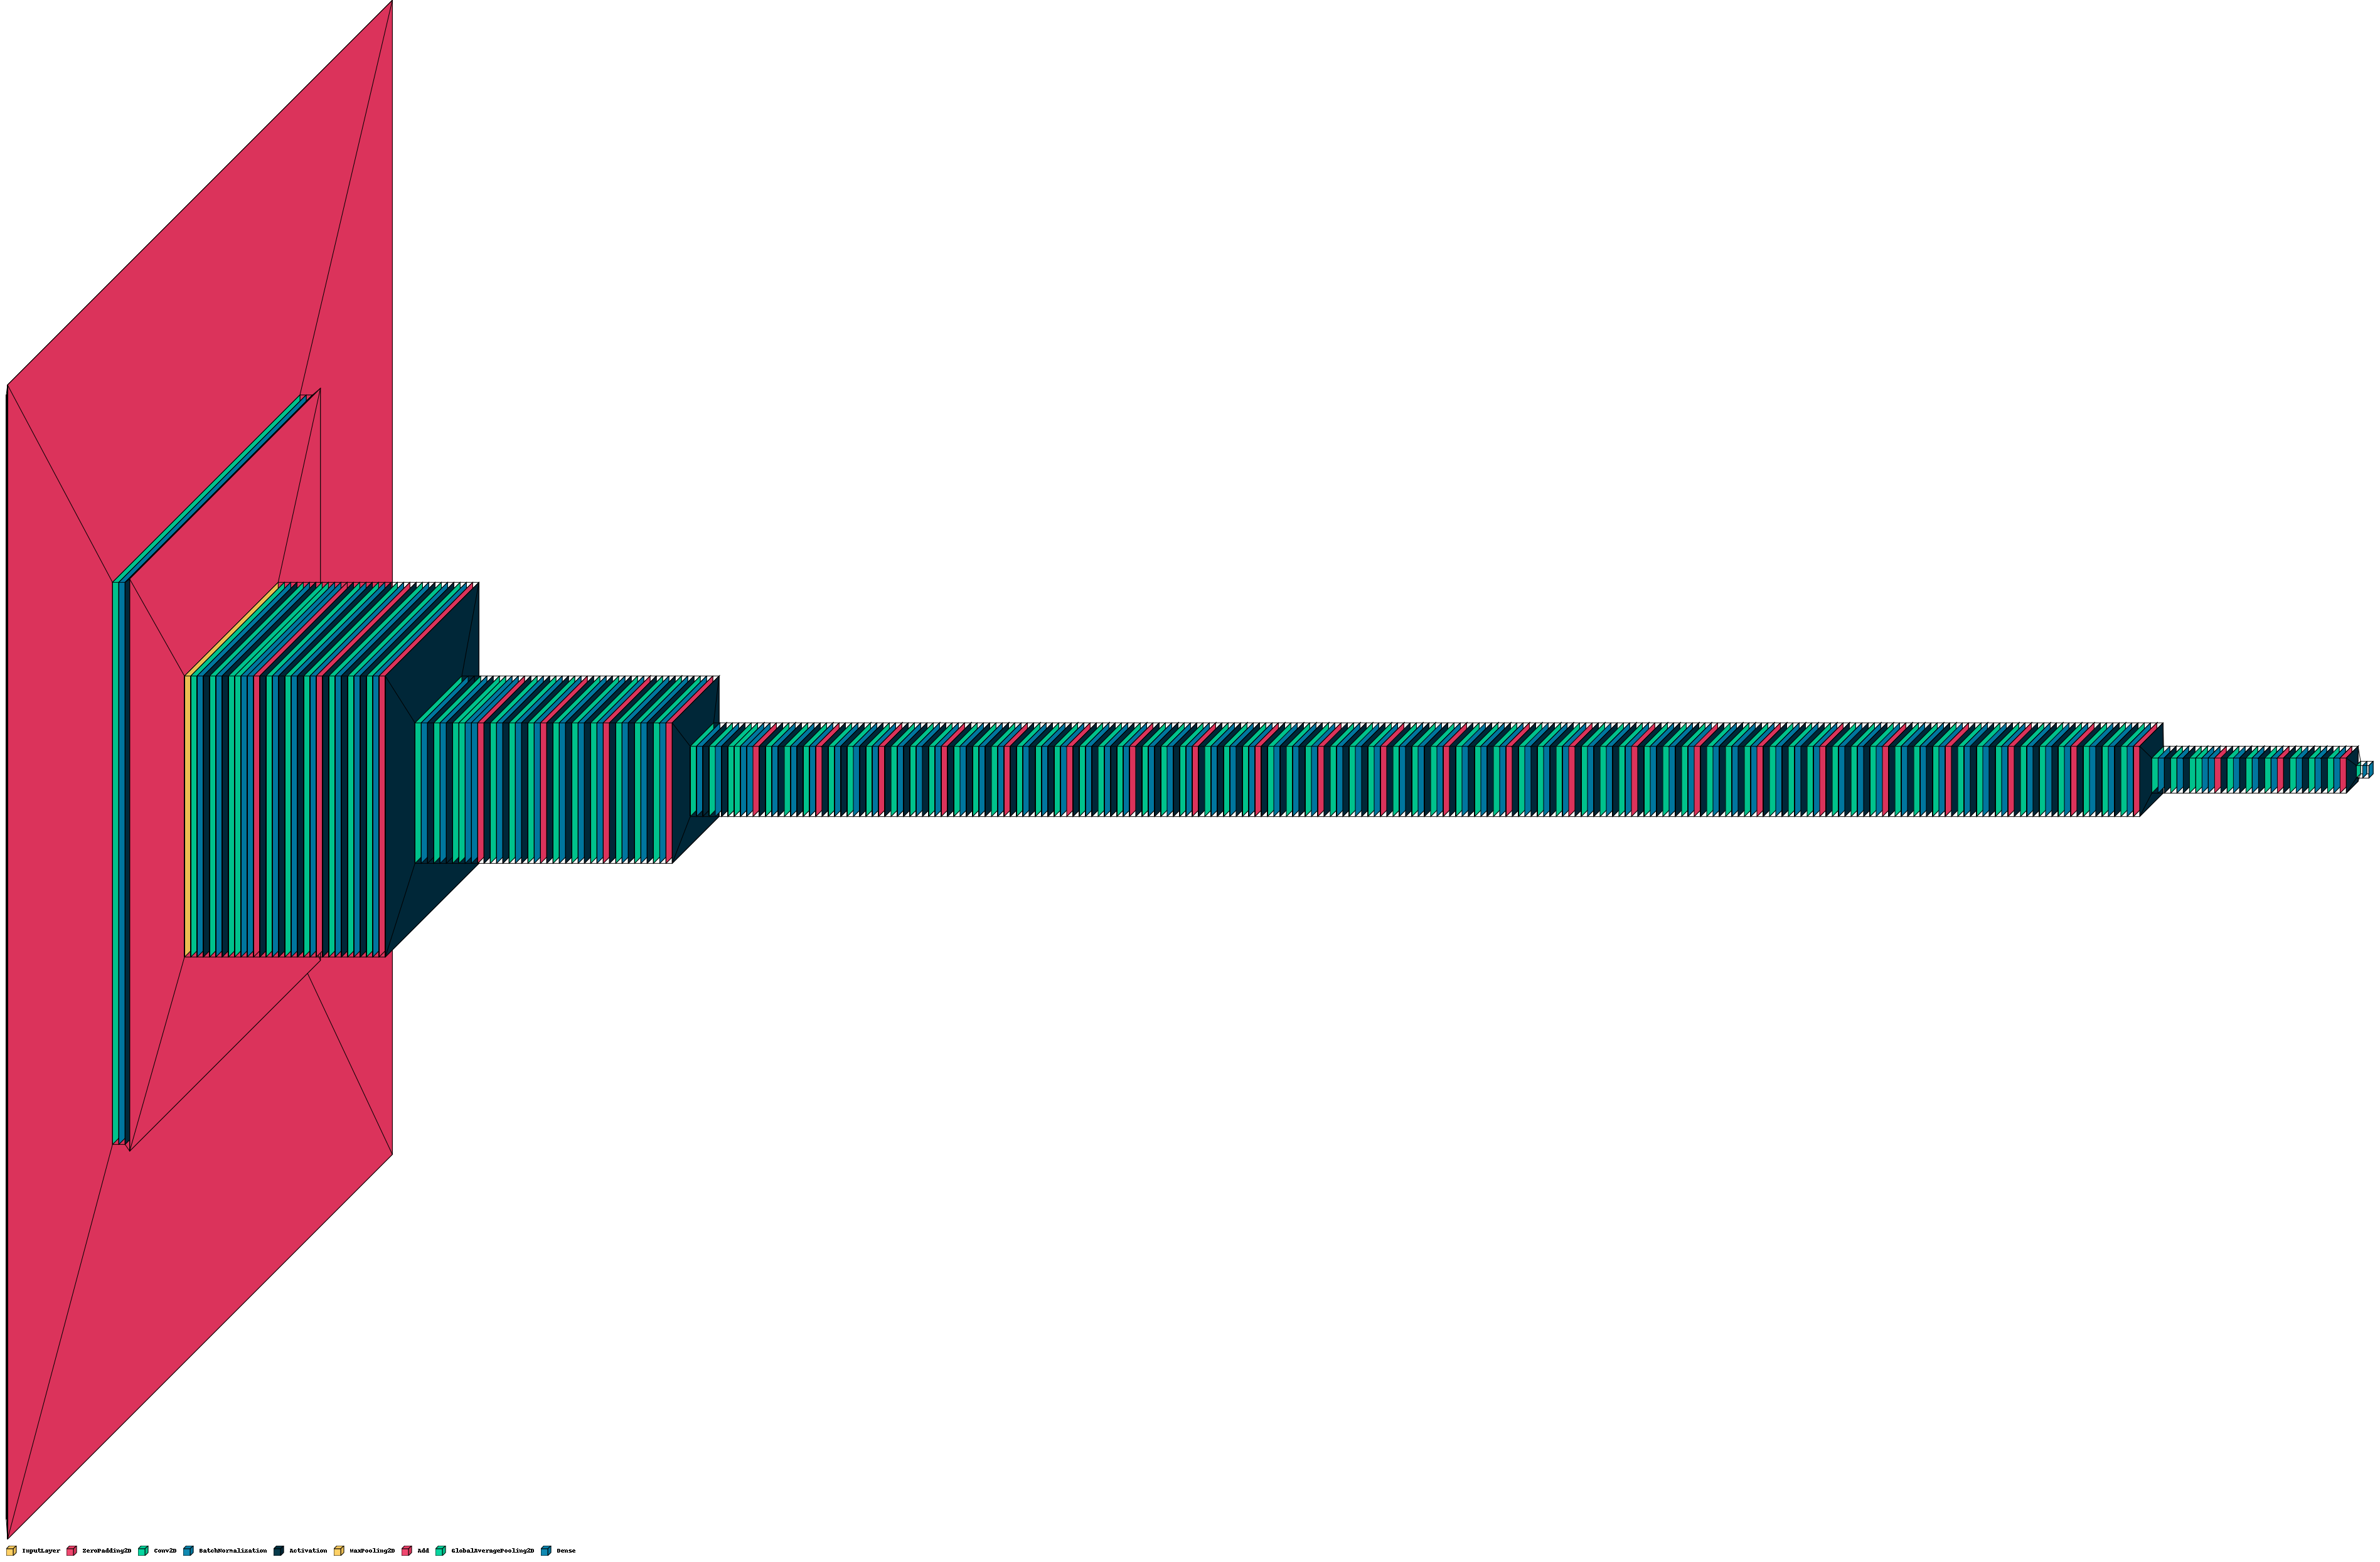

In [ ]:
model1=model
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model1, scale_xy=5, scale_z=3, max_z=3, legend=True)
#visualkeras.layered_view(model1, legend=True)

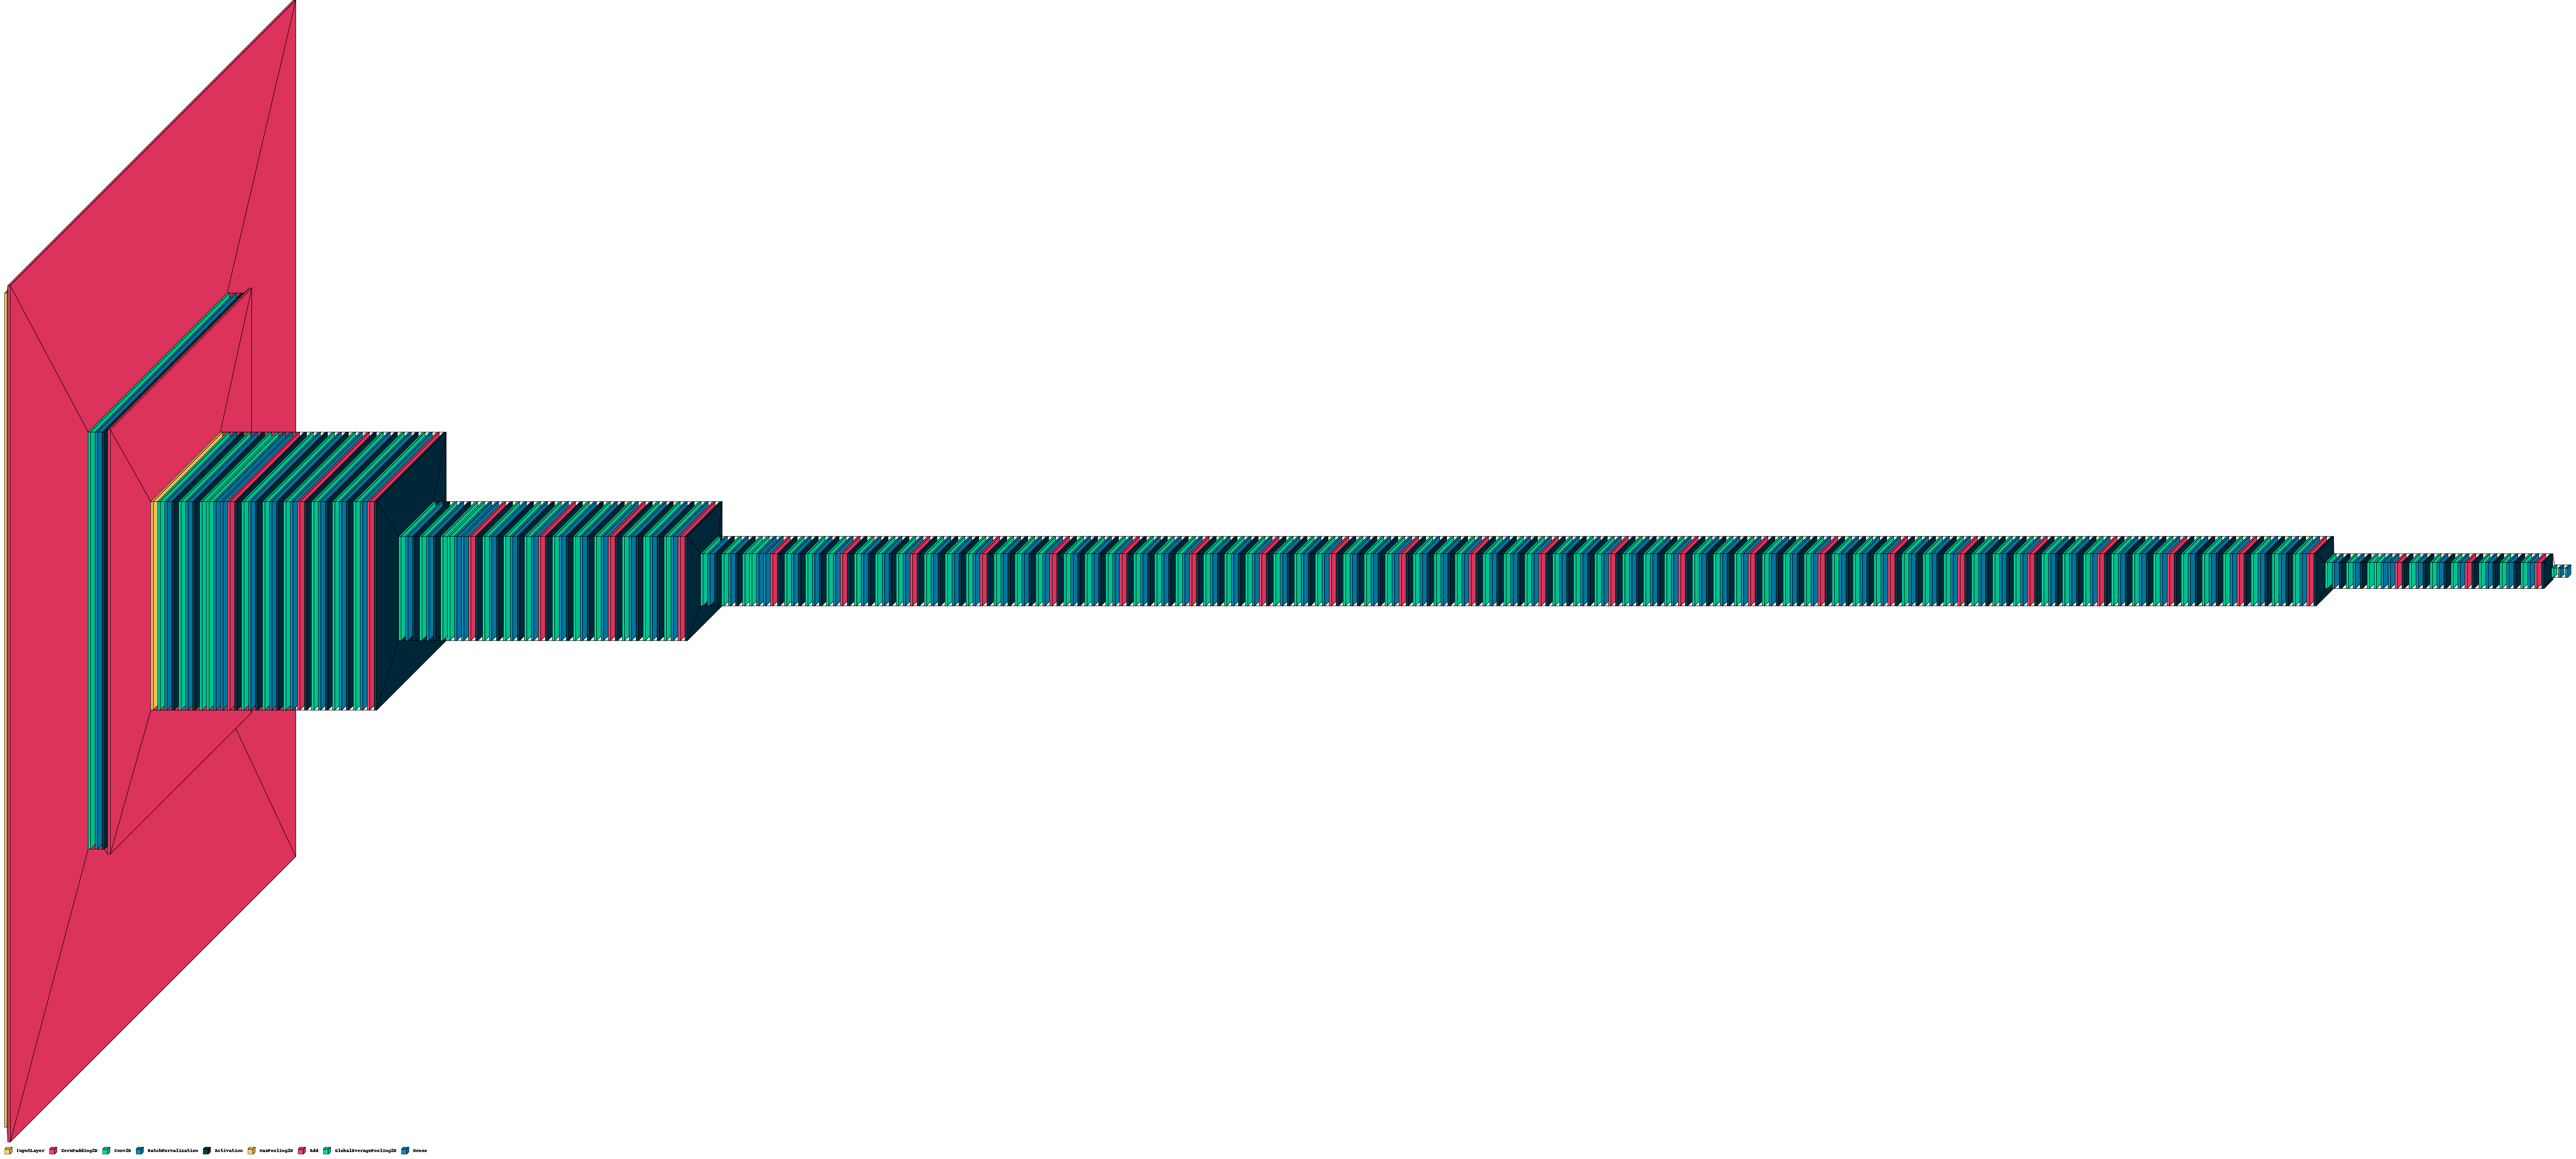

In [ ]:
model1=model
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model1, scale_xy=8, scale_z=5, max_z=5, legend=True)
#visualkeras.layered_view(model1, legend=True)

In [ ]:
# Load and preprocess the data
train_data_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/train'
val_data_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/validation'
test_data_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/test'

In [ ]:
# Set up data generators for training, validation, and testing
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/validation',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


Found 840 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [ ]:
# Train the model
model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples/train_generator.batch_size,
        epochs=10,
        validation_data=val_generator,
        validation_steps=val_generator.samples/val_generator.batch_size)

<ipython-input-15-7d1a1c61692c>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
26/26 [==============================] - 482s 18s/step - loss: 0.9164 - accuracy: 0.4917 - val_loss: 0.7542 - val_accuracy: 0.5000
Epoch 2/10
26/26 [==============================] - 458s 17s/step - loss: 0.6978 - accuracy: 0.5357 - val_loss: 0.6689 - val_accuracy: 0.5444
Epoch 3/10
26/26 [==============================] - 457s 17s/step - loss: 0.7136 - accuracy: 0.5190 - val_loss: 0.6824 - val_accuracy: 0.5278
Epoch 4/10
26/26 [==============================] - 453s 17s/step - loss: 0.6854 - accuracy: 0.5607 - val_loss: 0.6233 - val_accuracy: 0.6278
Epoch 5/10
26/26 [==============================] - 454s 17s/step - loss: 0.6610 - accuracy: 0.6024 - val_loss: 0.6187 - val_accuracy: 0.6389
Epoch 6/10
26/26 [==============================] - 452s 17s/step - loss: 0.6662 - accuracy: 0.5881 - val_loss: 0.6539 - val_accuracy: 0.5944
Epoch 7/10
26/26 [==============================] - 452s 17s/step - loss: 0.6610 - accuracy: 0.5976 - val_loss: 0.6024 - val_accuracy: 0.6944
Epoch 

In [ ]:
# Evaluate the model on the test data
score = model.evaluate_generator(test_generator, test_generator.samples/test_generator.batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

<ipython-input-16-ce71338dcc72>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, test_generator.samples/test_generator.batch_size)


Test loss: 0.6050887107849121
Test accuracy: 0.644444465637207


In [ ]:
# Evaluate the model on the validation data
val_score = model.evaluate_generator(val_generator, val_generator.samples/val_generator.batch_size)
print('Validation loss:', val_score[0])
print('Validation accuracy:', val_score[1])

<ipython-input-17-1062bb97ba0c>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  val_score = model.evaluate_generator(val_generator, val_generator.samples/val_generator.batch_size)


Validation loss: 0.611157238483429
Validation accuracy: 0.6555555462837219
